# <center> IIIT Vadodara </center>
## <center> Winter 2021-22 </center>
## <center> CS 612, CS 652, CS/IT 308 Machine Learning </center>
## <center> Lab#2 Bayes' classifier,k-means and k-NN</center>

In [112]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Bayesian decision rule under normality assumption
Hint: use classnote for same

### Consider the following data:
Here, second column represent the class

In [113]:
dataset = np.array([[3.39,0],[3.58,0],[2.28,0],[7.42,1],[5.74,1],[9.17,1],[7.79,1],[7.93,1],[1.34,0],[3.11,0]])
print('Feature|Classe')
print(dataset)

Feature|Classe
[[3.39 0.  ]
 [3.58 0.  ]
 [2.28 0.  ]
 [7.42 1.  ]
 [5.74 1.  ]
 [9.17 1.  ]
 [7.79 1.  ]
 [7.93 1.  ]
 [1.34 0.  ]
 [3.11 0.  ]]


### Find class probability $P_1$ and $P_2$

In [114]:
#write code here
classes=dataset[:,-1]
prob_C1,prob_C2=0,0
for c in classes:
    if c==1:
        prob_C1+=1
    else:
        prob_C2+=1
prob_C1=prob_C1/len(classes)
prob_C2=prob_C2/len(classes)
print(prob_C1,prob_C2)

0.5 0.5


### Find sample mean and sample standard deviation for each class 

In [115]:
#write code here
C1,C2,=[],[]
for i in range(len(classes)):
    if classes[i]==0:
        C1.append(dataset[i,0])
    else:
        C2.append(dataset[i,0])       
mu1=np.mean(C1)
sd1=np.std(C1)
mu2=np.mean(C2)
sd2=np.std(C2)
print(mu1,sd1)
print(mu2,sd2)

2.7399999999999998 0.8290476463991681
7.609999999999999 1.1046628444914763


### Plot $p_1(x)$ and $p_2(x)$

In [116]:
# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
    #write code here
    p=1/(stdev*np.sqrt(2*np.pi))*np.exp(-(x - mean)**2/(2 * stdev**2)) 
    return p

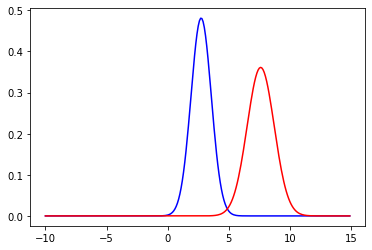

In [117]:
x  = np.arange(-10,15,0.1)
plt.plot(x,calculate_probability(x,mu1,sd1),'b',x,calculate_probability(x,mu2,sd2),'r')

### Test for $x=3$  and $x=5$

In [118]:
#for x=3
#write code here
x=3
if prob_C1*calculate_probability(x,mu1,sd1)-prob_C2*calculate_probability(x,mu2,sd2)>=0:
    print("Class 0")
else:
    print("Class 1")

Class 0


In [119]:
#for x=5
#write code here
x=5
if prob_C1*calculate_probability(x,mu1,sd1)-prob_C2*calculate_probability(x,mu2,sd2)>=0:
    print("Class 0")
else:
    print("Class 1")

Class 1


## Homework:
1. Try for this 2-D data using classnote
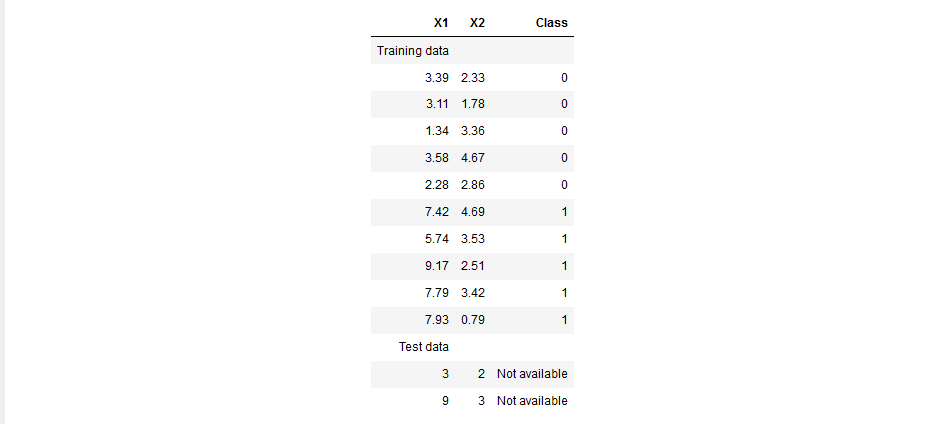
2. Implement Bayesian classifier for iris data.
You can get help from following link. https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/

In [120]:
#-------------Q 1 2D Data classification---------------------------
data=np.array([[3.39,2.33,0],[3.11,1.78,0],[1.34,3.36,0],[3.58,4.67,0],[2.28,2.86,0],[7.42,4.69,1],[5.74,3.53,1],
                  [9.17,2.51,1],[7.79,3.42,1],[7.93,0.79,1]])
summary=summarize_by_class(data)
test=[[3,2],[9,3]]
print("Test data | Predicted class")
for t in test:
    probabilities = calculate_class_probabilities(summary, t)
    class_label=max(probabilities,key=probabilities.get)
    print(t,class_label)

Test data | Predicted class
[3, 2] 0.0
[9, 3] 1.0


In [121]:
#write code here
#------------------Q 2 Iris dataset classification------------------------------
import numpy as np
def separate_by_class(d):
    dict={}
    labels=np.unique(d[:,-1])
    for l in labels:
        dict[l]=[]
    for i in range(len(d)):
        dict[d[i,-1]].append(d[i])
    return dict
            
def summarize_dataset(d):
    summary=[]
    for col in range(d.shape[1]-1):
        summary.append((np.mean(d[:,col]),np.std(d[:,col]),len(d[:,col])))
    return summary

def summarize_by_class(d):
    separated=separate_by_class(d)
    summaries={}
    for label,rows in separated.items():
        summaries[label]=summarize_dataset(np.array(rows))
    return summaries

def calculate_probability(x, mean, stdev):
    p=1/(stdev*np.sqrt(2 * np.pi))*np.exp(-(x - mean)**2/(2 * stdev**2)) 
    return p

def calculate_class_probabilities(s,t):
    tr=0
    for label in s:
        tr+=s[label][0][2]
    probabilities={}
    for class_value,class_summary in s.items():
        probabilities[class_value]=s[class_value][0][2]/float(tr)
        for i in range(len(class_summary)):
            mean,stdev,count=class_summary[i]
            probabilities[class_value]*=calculate_probability(t[i], mean, stdev)
    return probabilities        

In [122]:
import pandas as pd
df=pd.read_csv("Iris.csv")
dataset=df.to_numpy()
np.random.shuffle(dataset)
train,test=dataset[:80,:],dataset[80:,:]
summary=summarize_by_class(train)
print("\tTest data\t |\t Predicted class")
for t in test:
    probabilities = calculate_class_probabilities(summary, t)
    class_label=max(probabilities,key=probabilities.get)
    print(t,class_label)

	Test data	 |	 Predicted class
[3 4.7 3.2 1.3 0.2 'Iris-setosa'] Iris-setosa
[5 5.0 3.6 1.4 0.2 'Iris-setosa'] Iris-setosa
[96 5.7 3.0 4.2 1.2 'Iris-versicolor'] Iris-versicolor
[126 7.2 3.2 6.0 1.8 'Iris-virginica'] Iris-virginica
[15 5.8 4.0 1.2 0.2 'Iris-setosa'] Iris-setosa
[48 4.6 3.2 1.4 0.2 'Iris-setosa'] Iris-setosa
[11 5.4 3.7 1.5 0.2 'Iris-setosa'] Iris-setosa
[56 5.7 2.8 4.5 1.3 'Iris-versicolor'] Iris-versicolor
[103 7.1 3.0 5.9 2.1 'Iris-virginica'] Iris-virginica
[92 6.1 3.0 4.6 1.4 'Iris-versicolor'] Iris-versicolor
[80 5.7 2.6 3.5 1.0 'Iris-versicolor'] Iris-versicolor
[77 6.8 2.8 4.8 1.4 'Iris-versicolor'] Iris-versicolor
[31 4.8 3.1 1.6 0.2 'Iris-setosa'] Iris-setosa
[71 5.9 3.2 4.8 1.8 'Iris-versicolor'] Iris-versicolor
[116 6.4 3.2 5.3 2.3 'Iris-virginica'] Iris-virginica
[21 5.4 3.4 1.7 0.2 'Iris-setosa'] Iris-setosa
[46 4.8 3.0 1.4 0.3 'Iris-setosa'] Iris-setosa
[99 5.1 2.5 3.0 1.1 'Iris-versicolor'] Iris-versicolor
[87 6.7 3.1 4.7 1.5 'Iris-versicolor'] Iris-vers

## 2. K-Nearest neighbour (KNN)

Consider the following observations:
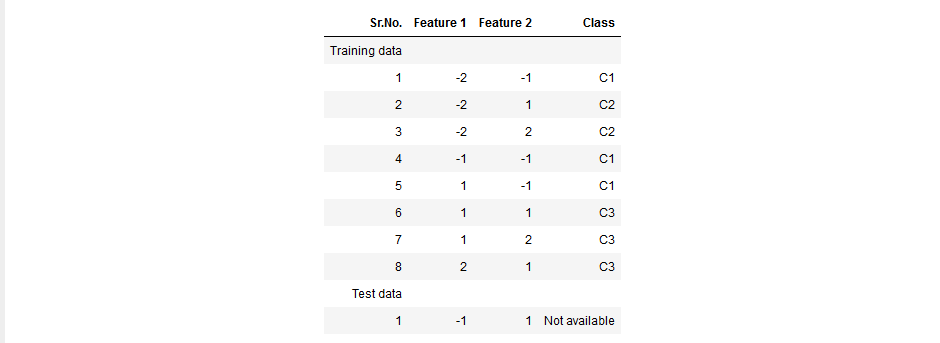

Use KNN technique to classify the test data using K=3.

Hint: 
<br>
1) Calculate the Euclidean distance between the new point and the existing points.
<br>
2) Sort out the points distance-wise.
<br>
3) Now select the k-neighbours. 

In [132]:
data = np.float32([[-2,-1,1],[-2,1,2],[-2,2,2],[-1,-1,1],[1,-1,1],[1,1,3],[1,2,3],[2,1,3]])
print('Feature1|Feature2|Class')
print(data)

Feature1|Feature2|Class
[[-2. -1.  1.]
 [-2.  1.  2.]
 [-2.  2.  2.]
 [-1. -1.  1.]
 [ 1. -1.  1.]
 [ 1.  1.  3.]
 [ 1.  2.  3.]
 [ 2.  1.  3.]]


In [133]:
data[:,0:2]

array([[-2., -1.],
       [-2.,  1.],
       [-2.,  2.],
       [-1., -1.],
       [ 1., -1.],
       [ 1.,  1.],
       [ 1.,  2.],
       [ 2.,  1.]], dtype=float32)

Feature1|Feature2|Class|Distance from test point
[-2. -1.  1.] 2.23606797749979
[-2.  1.  2.] 1.0
[-2.  2.  2.] 1.4142135623730951
[-1. -1.  1.] 2.0
[ 1. -1.  1.] 2.8284271247461903
[1. 1. 3.] 2.0
[1. 2. 3.] 2.23606797749979
[2. 1. 3.] 3.0
Test data [-1  1]
Class [2.]


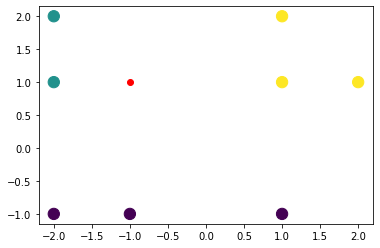

In [134]:
#write code here
from scipy import stats
test=np.array([-1,1])
X=data[:,0:2]
dist=[]
for i in range(len(X)):
    dist.append([np.linalg.norm(X[i]-test),data[i,2]])
sorted_dist=np.array(sorted(dist, key=lambda x: x[0]))
k=3
neighbours=np.array(sorted_dist[0:k])
m=stats.mode(neighbours[:,1])
classlabel=m[0]
plt.scatter(X[:,0],X[:,1],s=2**7,c=data[:,2])
plt.scatter(test[0],test[1],c='r')
print("Feature1|Feature2|Class|Distance from test point")
for i in range(len(data)):
    print(data[i],dist[i][0])
print("Test data",test)
print("Class",classlabel)


## 3. K-Means

Ignore the class information of the training data given in problem 2 and use K-means algorithm to classify the same. Assume the initial starting classes as:  
<br>
C1={observations 1,2}
<br>
C2={observations 3,4,5}
<br>
C3={observations 6,7,8}
<br>

Now using the result find the class that would be assigned to the test data.

<br>
Hint: 

1) Find the centroid (mean) of each cluster based on the initial classes assignment given.

2) Find out the Euclidean distance between each point and each cluster centroid. 

3) Assign all the points to the closest cluster centroid.

4) Recompute centroids of newly formed clusters.

5) Stop if the new centroids are same as old centroids else repeat step 2 to 4. 

In [126]:
X = data[:,:-1]
C1=[X[0],X[1]]
C2=[X[2],X[3],X[4]]
C3=[X[5],X[6],X[7]]
m,n = X.shape
centroid = np.array([np.mean(C1,axis=0),np.mean(C2,axis=0),np.mean(C3,axis=0)]) #write code here
print('intial centroids = \n',centroid)

intial centroids = 
 [[-2.         0.       ]
 [-0.6666667  0.       ]
 [ 1.3333334  1.3333334]]


[[-2.         0.       ]
 [-0.6666667  0.       ]
 [ 1.3333334  1.3333334]]


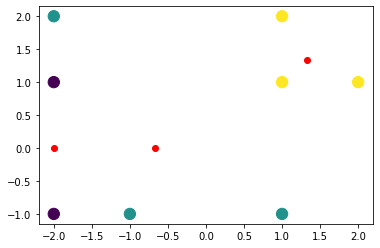

[[-2.         0.6666667]
 [ 0.        -1.       ]
 [ 1.3333334  1.3333334]]


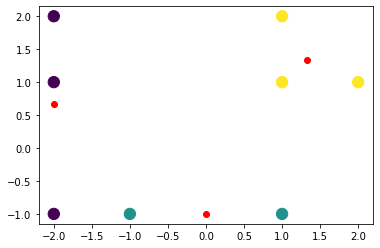

In [127]:
#write code for kmeans
def color(x,c1,c2,c3):
    colors=[None]*len(x)
    for i in range(len(x)):
        if(x[i]==c1).all(1).any():
            colors[i]=0
        elif(x[i]==c2).all(1).any():
            colors[i]=1
        else:
            colors[i]=2
    return colors
colors=color(X,C1,C2,C3)
while True:
    d1,d2,d3=C1,C2,C3
    centroid = np.array([np.mean(d1,axis=0),np.mean(d2,axis=0),np.mean(d3,axis=0)])
    print(centroid)
    colors=color(X,C1,C2,C3)
    plt.scatter(X[:,0],X[:,1],s=2**7,c=colors)
    plt.scatter(centroid[:,0],centroid[:,1],c='r')
    plt.show()
    C1,C2,C3=[],[],[]
    for i in range(len(X)):
        d=[np.linalg.norm(X[i]-centroid[0]),np.linalg.norm(X[i]-centroid[1]),np.linalg.norm(X[i]-centroid[2])]
        min_idx=d.index(min(d))
        if min_idx==0:
            C1.append(X[i])
        elif min_idx==1:
            C2.append(X[i])
        else:
            C3.append(X[i])
    if np.array_equal(C1,d1) and np.array_equal(C2,d2) and np.array_equal(C3,d3):
        
        break

In [128]:
print("Feature1|Feature2|Class")
for i in range(len(X)):
    print(X[i],colors[i])

Feature1|Feature2|Class
[-2. -1.] 0
[-2.  1.] 0
[-2.  2.] 0
[-1. -1.] 1
[ 1. -1.] 1
[1. 1.] 2
[1. 2.] 2
[2. 1.] 2
